# 1. Load & visualize the data

In [ ]:
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pdb
# if you need, you can use other libraries


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cuirie_0612_3.txt to cuirie_0612_3.txt


In [ ]:
a = '1 2 3'
b = list(a.split())
print(b)
for j in b:
  print(float(j))

['1', '2', '3']
1.0
2.0
3.0


In [ ]:
f = open('cuirie_0612_3.txt', 'r', encoding='utf-8')
reader=csv.reader(f)
x = []
y = []
fq = 4.37902

for i, row in enumerate(reader) :
  #pdb.set_trace()
  tmp = list(row[0].split())
  #print(tmp)
  x.append(float(tmp[0]))
  y.append(tmp[1:])
#x = x[:9]
#y = y[:9]
y = [[abs(float(k)) for k in Temp] for Temp in y]

[51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4]
15


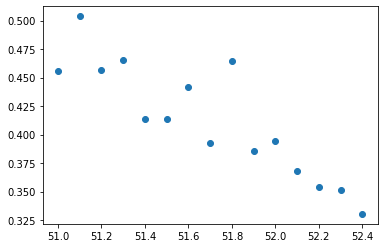

In [ ]:
aver_y = [np.mean([y[i]]) for i in range(len(x))]
print(x)
print(len(aver_y))
plt.scatter(x, aver_y)

In [ ]:
print(len(y[0]))

50


# 2. Implement Chi_square_minimization algorithm

In [ ]:
# Define Cost function J
def cost(x, average, theta, inv):
    # Compute cost for linear regression
    # J is the cost using theta as the parameter for linear regression to fit the data points in X and y

    dif = np.zeros((1,len(x)))
    dif_t = np.zeros((len(x),1))
    
    for i in range(len(x)):
      tmp=sqrt(fq*(1 - x[i]/theta))
      dif[0][i] = average[i] - tmp
      dif_t[i][0] = dif[0][i]
    
    J = np.matmul(dif, np.matmul(inv, dif_t))
    return J[0][0]


In [ ]:
len(x)

15

In [ ]:
    dif = np.ones((1,7))
    dif_t = np.ones((7,1))
    dif[0][2] = 3
    dif_t[2] = 5
    b = np.matmul(dif, dif_t)
    print(b[0][0])

21.0
[[21.]]


In [ ]:
# Implement Gradient descent algorithm
def gradient_descent(x, average, theta, alpha, num_iters, inv):
    # gradient_descent Performs gradient descent to learn theta
    # gradient_descent updates theta by taking num_iters gradient steps with learning rate alpha
    
    for iter in range(num_iters):
        s=[0,0]
        rounda = np.zeros((1, len(x)))
        roundb = np.zeros((1, len(x)))
        dif_t = np.zeros((len(x),1))

        for i in range(len(x)):
          dif_t[i][0] = sqrt(fq*(1-x[i]/theta)) - average[i]
          roundb[0][i] = sqrt(fq)*x[i]/2/sqrt(1-x[i]/theta)/(theta**2)
        ###################################################################################
        s = 2*np.matmul(roundb, np.matmul(inv, dif_t))[0][0]

        theta-=alpha*s
        if theta<max(x):
          print("err")
          theta = max(x)
        ###################################################################################
          
            
        ################################################w###################################
        #                                  END OF YOUR CODE                               #
        ###################################################################################

        # Save the cost J in every iteration    
        J = cost(x, average, theta, inv)
        #print("i, theta", iter, theta, J)
        
        if (iter+1)%25000 is 0:
            print('cost at %d iterations : %f, theta : %f' %(iter+1, J, theta))
            
    return theta

In [ ]:
N = len(x)
###################################################################################
average = np.zeros((50,N))
covariance = np.zeros((50, N, N))
theta = np.zeros(50)
ki_square = np.zeros(50)
dif = np.zeros((1,N))
dif_t = np.zeros((N,1))

for out in range(50):
  print('out : ', out)
  for i in range(N):
    s = 0
    for j in range(50):
      if j==out:
        continue
      s += y[i][j]
    average[out][i] = s/49
  #plt.scatter(x, average[out])
  #pdb.set_trace()
  for i in range(N):
    for j in range(N):
      sum = 0
      for k in range(50):
        if k==out:
          continue
        sum += (y[i][k] - average[out][i])*(y[j][k] - average[out][j])
      covariance[out][i][j] = sum/(49*48)
  #print("cov", covariance[out])

  cov_inv = np.linalg.inv(covariance[out])
  num_iters = 100000
  alpha = 0.00001
  theta[out] = 53.6
  # compute initial cost
  init_J = cost(x, average[out], theta[out], cov_inv)
  print('initial cost : %f' %init_J)

  # excute gradient descent
  theta[out] = gradient_descent(x, average[out], theta[out], alpha, num_iters, cov_inv)

  # compute new cost
  new_J = cost(x, average[out], theta[out], cov_inv)
  for i in range(N):
    dif[0][i] = average[out][i] - sqrt(fq*(1 - x[i]/theta[out]))
    dif_t[i][0] = dif[0][i]
  ki_square[out] = np.matmul(dif, np.matmul(cov_inv, dif_t))[0][0]

  print('updated theta : ', theta[out])
  print('updated cost : %f' %new_J)

#def cost(x, average, theta, inv):
#def gradient_descent(x, average, theta, alpha, num_iters, inv)

#data_x, data_y = x,y
###################################################################################
#                                  END OF YOUR CODE                               #
###################################################################################


out :  0
initial cost : 65.127051
cost at 25000 iterations : 35.530727, theta : 53.846519
cost at 50000 iterations : 35.530727, theta : 53.846519
cost at 75000 iterations : 35.530727, theta : 53.846519
cost at 100000 iterations : 35.530727, theta : 53.846519
updated theta :  53.846519445503766
updated cost : 35.530727
out :  1
initial cost : 63.263225
cost at 25000 iterations : 32.371963, theta : 53.851207
cost at 50000 iterations : 32.371963, theta : 53.851207
cost at 75000 iterations : 32.371963, theta : 53.851207
cost at 100000 iterations : 32.371963, theta : 53.851207
updated theta :  53.85120662147256
updated cost : 32.371963
out :  2
initial cost : 69.010304
cost at 25000 iterations : 32.625275, theta : 53.858700
cost at 50000 iterations : 32.625275, theta : 53.858700
cost at 75000 iterations : 32.625275, theta : 53.858700
cost at 100000 iterations : 32.625275, theta : 53.858700
updated theta :  53.858699836720874
updated cost : 32.625275
out :  3
initial cost : 63.126088
cost at

In [ ]:
theta

array([53.84651945, 53.85120662, 53.85869984, 53.85021427, 53.86199447,
       53.87894567, 53.83863552, 53.85091398, 53.84839625, 53.91381525,
       53.84051702, 53.84000772, 53.82518456, 53.85343923, 53.8427811 ,
       53.85073023, 53.85242139, 53.83889964, 53.84308802, 53.84235983,
       53.85217123, 53.84954038, 53.85095788, 53.83516412, 53.85007373,
       53.86283106, 53.82935362, 53.835138  , 53.86011556, 53.86120553,
       53.85758522, 53.85568092, 53.83733034, 53.85393598, 53.83163125,
       53.85693855, 53.86214011, 53.85101483, 53.86251952, 53.85029641,
       53.85095097, 53.86508808, 53.85304027, 53.85015   , 53.8508907 ,
       53.85713621, 53.83820037, 53.84649115, 53.84863639, 53.84767728])

In [ ]:
ki_square

array([35.53072657, 32.37196299, 32.62527497, 32.75126536, 34.96624155,
       34.90237853, 33.00530685, 33.58708367, 32.51808812, 41.64919659,
       39.54555884, 33.51247088, 41.38403138, 33.81131723, 32.90528093,
       32.39492424, 34.77148322, 33.50537275, 34.53945113, 33.57192916,
       32.92518631, 34.45895216, 33.65510089, 35.81587363, 33.37608195,
       33.67839485, 34.44164532, 40.84951783, 36.56343529, 34.65147407,
       37.51689485, 32.92611084, 33.48857264, 36.93651803, 37.2163394 ,
       32.63916876, 35.0003909 , 32.40446523, 32.91474309, 32.44747756,
       32.39837801, 34.32436824, 32.79286733, 32.33633605, 33.9213183 ,
       37.02430108, 40.11174857, 33.30168142, 34.25192435, 32.43277285])

In [ ]:
dof

NameError: ignored

In [ ]:
theta_aver = np.zeros(1)
theta_err = np.zeros(1)
theta_sum = np.zeros(1)

for i in range(1):
  tmp = 0
  for j in range(50):
    tmp += theta[j]
  theta_aver[i] = tmp/50

for i in range(1):
  tmp = 0
  for j in range(50):
    tmp += (theta_aver[i] - theta[j])**2
  theta_err[i] = sqrt(49/50*tmp)

print("Tc_average : ", theta_aver[0])
print("Tc_err : ", theta_err[0])

tmp = 0
for i in range(50):
  tmp += ki_square[i]
ki_aver = tmp/50
dof = N-1 #degree of freedom. 9-2=7

tmp = 0
for i in range(50):
  tmp += (ki_aver/dof - ki_square[i]/dof)**2
ki_err = sqrt(49/50*tmp)

print("chi_square/dof : ", ki_aver/dof)
print("chi/dof_err : ", ki_err)



Tc_average :  53.85085311461357
Tc_err :  0.09399536420825075
chi_square/dof :  2.4723591210861433
chi/dof_err :  1.2276685225661026


# 3. Plot the linear regression fit

[51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4]
[0.45583999999999997, 0.50384, 0.4562800000000001, 0.4652400000000001, 0.4134399999999999, 0.41408000000000006, 0.4414, 0.39232, 0.4649999999999999, 0.38543999999999995, 0.39452000000000004, 0.3683600000000001, 0.35436, 0.35168, 0.33043999999999996]
40


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


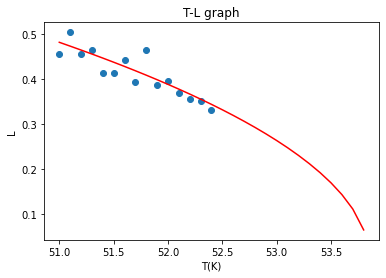

In [ ]:
# Plot the scatter plot and linear regression fit

###################################################################################
aver_y = [np.mean([y[i]]) for i in range(len(x))]
print(x)
print(aver_y)

plt.xlabel('T(K)')
plt.ylabel('L')
plt.title('T-L graph')
plt.scatter(x, aver_y)
new_x=np.arange(min(x),55,0.1)
print(len(new_x))
nx=len(new_x)
import pdb
#pdb.set_trace()
#new_y=new_x*(theta[1]*np.ones(len(new_x)))+(theta[0]*np.ones(len(new_x)))
new_y = np.sqrt(fq*(np.ones(nx) - new_x/theta_aver[0]))
plt.plot(new_x,new_y,'r')

